In [1]:
import pandas as pd
df=pd.read_csv("student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
df.shape

(395, 33)

In [3]:
# Quick Stats
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
# Checking null values 
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Q1) Which School performed the best in terms of the average grades combined?

In [6]:
df["school"].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [5]:
#Add Combined average of all grades column
df['Average_G'] = (df['G1']+df['G2']+df['G3'])/3

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average_G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [12]:
results = df.groupby(['school']).mean().sort_values('Average_G', ascending=False)
results

<ipython-input-12-fb9c84387b94>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df.groupby(['school']).mean().sort_values('Average_G', ascending=False)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average_G
school,,,,,,,,,,,,,,,,,
GP,16.521490,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.939828,10.782235,10.489971,10.737345
MS,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,10.673913,10.195652,9.847826,10.239130


In [13]:
results["Average_G"]

school
GP    10.737345
MS    10.239130
Name: Average_G, dtype: float64

In [ ]:
#It can be seen that on average_G GP slightly performed better on average than MS

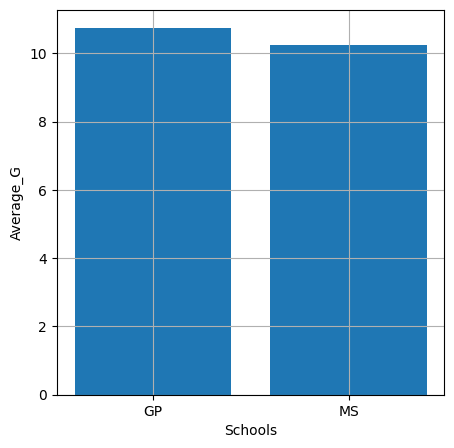

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
schools = [school for school, df1 in df.groupby('school')]
plt.bar(schools,results['Average_G'])
plt.ylabel('Average_G')
plt.xlabel('Schools')
plt.grid()
plt.show()

Q2) Why GP performed better ?

In [ ]:
# lets see which school has more number of student

In [21]:
GP = df.loc[df['school']=='GP'].count()[0]
GP

349

In [22]:
MS = df.loc[df['school']=='MS'].count()[1]
MS

46

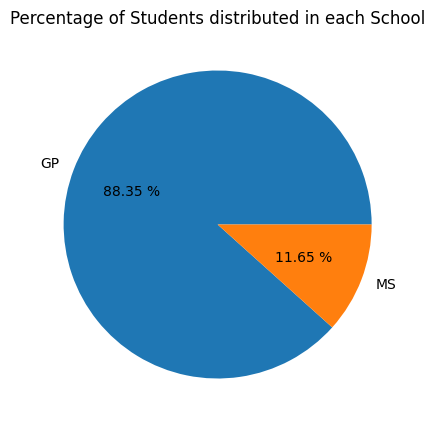

In [24]:
# Creating a pie chart
plt.figure(figsize=(8,5))
labels = ['GP','MS']
plt.pie([GP,MS], labels=labels,autopct='%.2f %%')
plt.title('Percentage of Students distributed in each School')
plt.show()
# A lot of Students went to GP approximately 8 times greater than MS which can explain their average_G being high due to a larger number of students

Q3) How does Parents employability affect the students grades looking at average of grades combined?

In [28]:
df["Fjob"].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [29]:
df["Mjob"].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [31]:
df['M+FJob']=df['Mjob']+'+'+df['Fjob']
df['M+FJob']

0        at_home+teacher
1          at_home+other
2          at_home+other
3        health+services
4            other+other
             ...        
390    services+services
391    services+services
392          other+other
393       services+other
394        other+at_home
Name: M+FJob, Length: 395, dtype: object

In [32]:
results1 = df.groupby(['M+FJob']).mean().sort_values('M+FJob')
results1

<ipython-input-32-ad0506429de0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results1 = df.groupby(['M+FJob']).mean().sort_values('M+FJob')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average_G
M+FJob,,,,,,,,,,,,,,,,,
at_home+at_home,17.000000,1.714286,2.142857,1.142857,2.285714,0.142857,3.142857,3.428571,2.857143,1.571429,2.000000,2.142857,1.857143,13.857143,13.428571,12.285714,13.190476
at_home+health,18.000000,1.500000,2.500000,1.500000,2.500000,1.000000,4.000000,2.000000,2.500000,1.000000,1.000000,2.000000,8.000000,12.500000,11.500000,11.500000,11.833333
at_home+other,16.909091,1.666667,1.878788,1.818182,2.090909,0.515152,3.909091,3.060606,2.909091,1.333333,2.545455,3.515152,5.515152,9.727273,9.090909,8.878788,9.232323
at_home+services,17.000000,1.600000,2.333333,1.533333,2.000000,0.333333,4.066667,2.866667,3.266667,1.533333,2.400000,3.333333,4.000000,10.666667,9.866667,8.800000,9.777778
at_home+teacher,16.500000,3.500000,4.000000,3.000000,2.000000,0.000000,4.500000,3.000000,3.500000,1.000000,1.000000,4.000000,3.000000,7.000000,3.000000,3.000000,4.333333
health+health,16.166667,3.833333,3.333333,1.166667,2.166667,0.333333,4.333333,3.833333,3.333333,1.333333,1.666667,4.333333,4.166667,12.833333,13.333333,13.500000,13.222222
health+other,17.000000,3.647059,3.000000,1.294118,1.823529,0.176471,3.647059,3.352941,3.764706,1.176471,2.764706,3.647059,6.000000,12.000000,11.764706,11.588235,11.784314
health+services,15.400000,3.500000,2.500000,1.100000,2.200000,0.300000,3.800000,2.500000,2.500000,1.300000,2.100000,3.600000,2.200000,12.400000,12.900000,12.400000,12.566667
health+teacher,16.000000,4.000000,4.000000,1.000000,2.000000,0.000000,2.000000,4.000000,4.000000,2.000000,3.000000,4.000000,6.000000,10.000000,11.000000,11.000000,10.666667


In [ ]:
# Creating a list for plotting the results

In [35]:
mfs = [mf for mf, df1 in df.groupby('M+FJob')]
mfs

['at_home+at_home',
 'at_home+health',
 'at_home+other',
 'at_home+services',
 'at_home+teacher',
 'health+health',
 'health+other',
 'health+services',
 'health+teacher',
 'other+at_home',
 'other+health',
 'other+other',
 'other+services',
 'other+teacher',
 'services+at_home',
 'services+health',
 'services+other',
 'services+services',
 'services+teacher',
 'teacher+at_home',
 'teacher+health',
 'teacher+other',
 'teacher+services',
 'teacher+teacher']

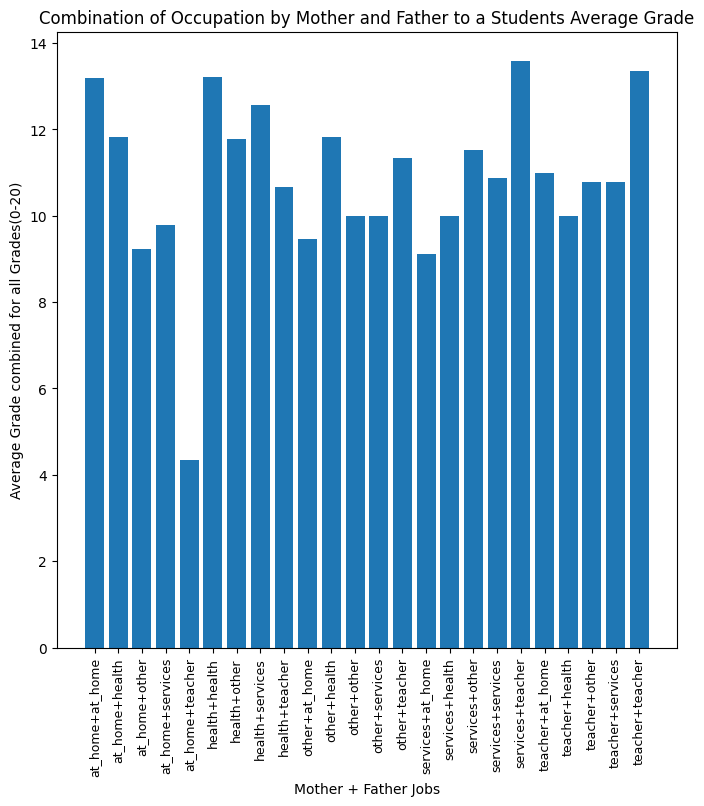

In [38]:
plt.figure(figsize=(8,8))
plt.bar(mfs, results1['Average_G'])
plt.xticks(mfs, rotation = 'vertical', size = 9)
plt.xlabel('Mother + Father Jobs')
plt.ylabel('Average Grade combined for all Grades(0-20)')
plt.title('Combination of Occupation by Mother and Father to a Students Average Grade')
plt.show()

In [ ]:
# from the above graph we have observed that when the Mother is in Services and the Father is a teacher the Student is likely to perform better compared to other combinations
# When the Mother is at home and the Father is a teacher the student performs worse compared to other combinations

Q4) In the above given dataset if the probability of getting a gender female is 0.52 and the sample size is 395.Find the binomial probability distribution of the event.

In [ ]:
df["sex"].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [ ]:
208/(208+187) # P(F)

0.5265822784810127

205.4 98.592


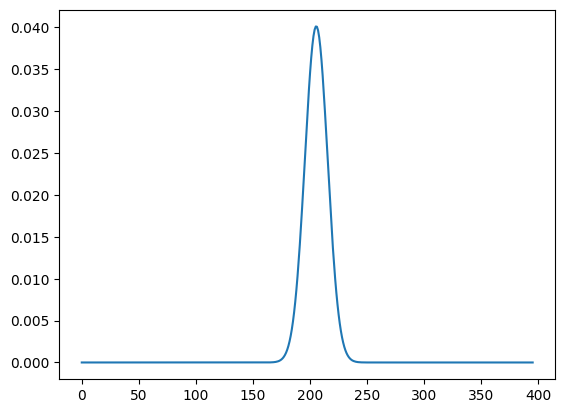

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom
n=395 # number of trials
p=0.52 # probability of an event
r=list(range(n+1)) # number of favorable outcomes
mean,var=binom.stats(n,p) # mean and variance of the sample
print(mean,var)
dist=list(binom.pmf(x,n,p) for x in r) # probability mass function
plt.plot(r,dist) # plotting the probability distribution
plt.show()

 Q5) Create a gaussian probability distribution for the number of school absences for 395 random samples.


In [ ]:
df["absences"].mean() # first we will callculate mean and standard deviation

5.708860759493671

In [ ]:
df["absences"].std()

8.00309568710818

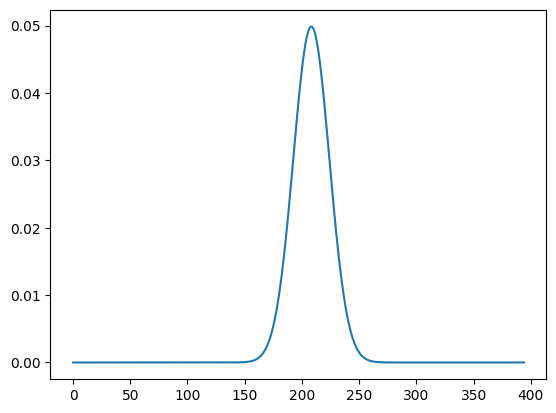

In [ ]:
# importing the scipy library
from scipy.stats import norm
import numpy as np
mean=5.7
std_dev=8
sample=np.linspace(-100,100,395)
f=norm(mean,std_dev)
dist=f.pdf(sample)
plt.plot(dist)

Q6) **Context** : Consider the following deduction from the given dataset. Minimum free time spent is 1 hour and Maximum free time spent is 5 hours. The Mean free time spent out by 395 
students are 3.23 hours.

**Problem Statement** :Let's suppose a teacher wants to analyze the free time spent by 395 students after school. What is the probability that the free time spent by those students who have free time between 1 to 4 hours/day, goes up to 5 hours/day?

**Task** : Plot the poisson probability distribution for the problem statement


In [ ]:
df["freetime"].mean() 

3.2354430379746835

In [ ]:
df["freetime"].unique()

array([3, 2, 4, 1, 5])

In [ ]:
from scipy.stats import poisson

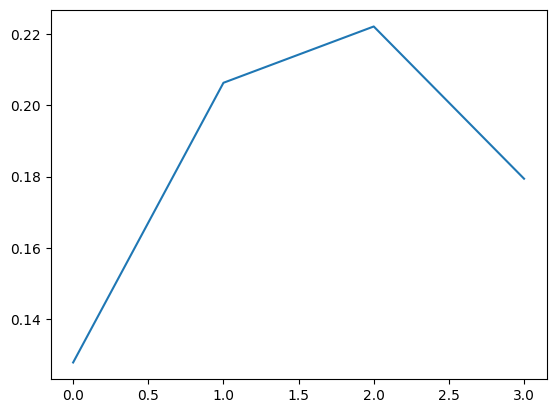

In [ ]:
X=[1,2,3,4]
sample=poisson.pmf(X,3.23)
plt.plot(sample)
plt.show()